# 绘制邻居间的距离网格
在研究细胞之间的邻里关系时，例如确定细胞是否能够相互通信，它们之间的距离是相关的。我们可以使用距离网格来可视化这些关系。

In [1]:
import pyclesperanto_prototype as cle
from numpy import random
from skimage.io import imread

我们使用的是由[Heriche等人](https://doi.org/10.1091/mbc.E13-04-0221)发布的数据集，以[CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)许可证发布，可在[Image Data Resource](https://idr.openmicroscopy.org/webclient/img_detail/179719/)上获取。

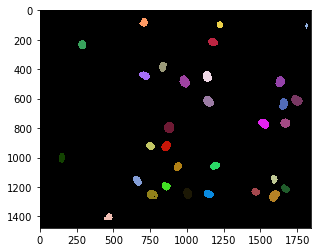

In [2]:
raw_image = imread("../../data/plate1_1_013 [Well 5, Field 1 (Spot 5)].png")[:,:,0]

nuclei = cle.voronoi_otsu_labeling(raw_image, spot_sigma=15)

cle.imshow(nuclei, labels=True)

例如，可以在邻近的邻居之间绘制网格，即距离小于给定最大距离的细胞核。

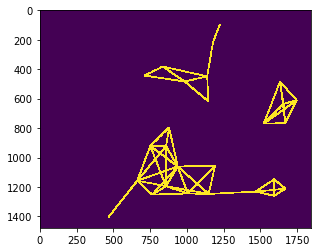

In [3]:
max_distance = 320

proximal_neighbor_mesh = cle.draw_mesh_between_proximal_labels(nuclei, maximum_distance=max_distance)

# 为了可视化目的，我们将线条稍微加粗
proximal_neighbor_mesh = cle.maximum_box(proximal_neighbor_mesh, radius_x=5, radius_y=5)

cle.imshow(proximal_neighbor_mesh)

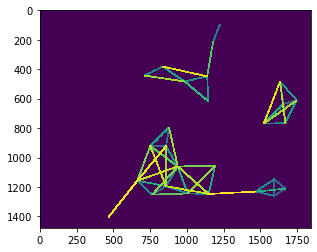

In [4]:
proximal_distance_mesh = cle.draw_distance_mesh_between_proximal_labels(nuclei, maximum_distance=max_distance)

# 为了可视化目的，我们将线条稍微加粗
proximal_distance_mesh = cle.maximum_box(proximal_distance_mesh, radius_x=5, radius_y=5)

cle.imshow(proximal_distance_mesh)

## 距离网格的更多细节
要绘制距离网格，我们需要结合距离矩阵（所有对象之间距离的抽象表示）和邻域矩阵（表示哪些细胞是邻居）。

我们先从距离矩阵开始。

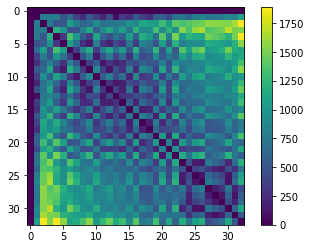

In [5]:
centroids = cle.centroids_of_background_and_labels(nuclei)

distance_matrix = cle.generate_distance_matrix(centroids, centroids)

# 我们忽略与背景对象的距离
cle.set_column(distance_matrix, 0, 0)
cle.set_row(distance_matrix, 0, 0)

cle.imshow(distance_matrix, colorbar=True)

接下来，我们应该设置一个矩阵，表示每个细胞核（从左到右）的n个最近邻居。

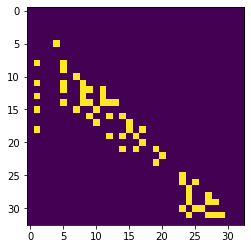

In [6]:
proximal_neighbor_matrix = cle.generate_proximal_neighbors_matrix(distance_matrix, max_distance=max_distance)

cle.imshow(proximal_neighbor_matrix)

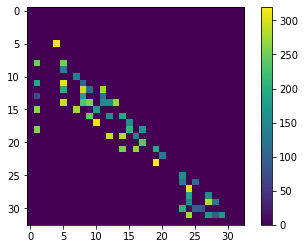

In [7]:
distance_touch_matrix = distance_matrix * proximal_neighbor_matrix

cle.imshow(distance_touch_matrix, colorbar=True)

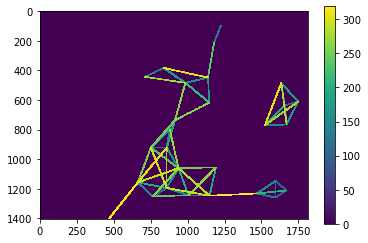

In [8]:
distance_mesh1 = cle.touch_matrix_to_mesh(centroids, distance_touch_matrix)

# 为了可视化目的，我们将线条稍微加粗
distance_mesh1 = cle.maximum_box(distance_mesh1, radius_x=5, radius_y=5)

cle.imshow(distance_mesh1, colorbar=True)

为了检查上面的细胞核是否仍然是网格的中心，我们将两者放在一张图像中。

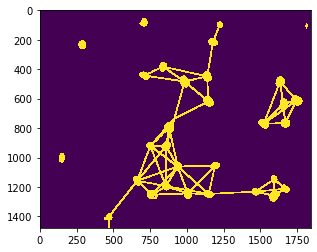

In [9]:
visualization = cle.maximum_images(nuclei > 0, distance_mesh1 > 0)

cle.imshow(visualization)